##**Predicting Stock Prices using Long Short-Term Memory (LSTM Model) : NIFTY 50 & Bharat Petroleum Corporation Ltd.**

### **Name & Enrollment Number:**
- Saumya Raghuvanshi (055040)
- Vibhavari Saran (055055)<br>

### **Group Number:** Group 16

### **Tools & Libraries Used:**  
- **Python** (Primary Programming Language)  
- **Libraries:**  
  - `TensorFlow` & `Keras` – For building and training the deep learning models  
  - `Scikit-Learn` – For data preprocessing and performance evaluation  
  - `Pandas` & `NumPy` – For data manipulation and analysis  
  - `Matplotlib` & `Seaborn` – For data visualization  
  - `Yahoo Finance (yfinance)` – To fetch historical stock price data

## **Description of Data**  
### **Dataset Overview:**  
- The dataset consists of **historical stock price data** for:  
  1. **NIFTY 50 Index** (India's benchmark stock market index)  
  2. **BPCL (Bharat Petroleum Corporation Ltd.)**  

- Data is fetched from **Yahoo Finance (yfinance)** API, covering:  
  - **NIFTY 50:** From **2005-09-25 to 2025-03-25**  
  - **BPCL:** From **2005-09-15 to 2025-03-25**  

### **Key Features Used:**  
- **Date:** Timestamp for each trading day.  
- **Closing Price:** The most crucial attribute, which represents the price at which the stock/index closed for the day.  

### **Data Preprocessing:**  
- **Missing Values Handling:** Checked and ensured no missing values in the dataset.  
- **Feature Scaling:** Applied **Min-Max Scaling** (range 0-1) to normalize the closing price data for better model convergence.  

## **Project Objectives | Problem Statements**  
The project aims to answer the following key questions:  
1. **Can deep learning (LSTM) accurately predict stock closing prices using historical data?**  
2. **How effective is the LSTM model in tracking stock price movements?**  
3. **Can this model provide insights for investors and traders in making better financial decisions?**  
4. **What are the limitations, and how can they be improved for better accuracy?**  

### **Key Objectives:**  
- Develop **separate LSTM models** for NIFTY 50 and BPCL for stock price forecasting.  
- Train the models using historical price data and evaluate their performance.  
- Compare predicted values against actual stock prices.  
- Assess model accuracy using **Mean Squared Error (MSE)** and **Mean Absolute Percentage Error (MAPE)**.  
- Provide business insights and recommendations for investors and traders.

## **Analysis of Data**  
### **1. Data Preparation**  
- Extracted the **Closing Price** for both NIFTY 50 and BPCL.  
- **Applied Min-Max Scaling** to normalize the data between **0 and 1** to ensure better training efficiency.  

### **2. Time-Series Data Structuring**  
- Created input sequences using a **sliding window approach** where the past **60 days' closing prices** were used to predict the next day's price.  
- Split the dataset into **80% training** and **20% testing** to evaluate the model’s predictive capability.  

### **3. Model Construction (LSTM Architecture)**  
Built **separate LSTM models** for both NIFTY 50 and BPCL.  

**Model Architecture:**  
- **Input Layer:** Takes a 3D input shape (number of samples, time steps, features).  
- **LSTM Layers:**  
  - Three **LSTM layers** with **50 neurons each**.  
  - Each LSTM layer learns sequential patterns from stock price trends.  
- **Dropout Layers:**  
  - **Dropout rate = 0.2** (prevents overfitting).  
- **Dense Layers:**  
  - **One Dense layer with 25 neurons (ReLU activation).**  
  - **One output layer with a single neuron** (linear activation for stock price prediction).  
- **Compilation:**  
  - Optimizer: **Adam (learning rate = 0.001)**  
  - Loss function: **Mean Squared Error (MSE)**  

### **4. Model Training & Evaluation**  
- **Trained for 10 epochs** with a batch size of **32**.  
- Used a **custom callback function** to track loss and validation loss per epoch.  
- **Predictions were inverse transformed** back to original values to compare against actual stock prices.  



## **Observations | Findings**  
### **NIFTY 50 Model:**  
**The model successfully captured price trends** but showed some occasional deviations.  
**Validation loss was low**, indicating reasonable generalization.  
**Mean Absolute Percentage Error (MAPE) was within an acceptable range** for financial forecasting models.  

### **BPCL Model:**  
**More volatile compared to the NIFTY 50 model**, indicating that the BPCL stock is subject to higher fluctuations.  
**Dropout layers helped reduce overfitting**, but further tuning is needed for improved accuracy.  
**Some predicted values lagged behind actual trends**, possibly due to sudden market fluctuations.  



## **Managerial Insights | Recommendations**  
### **Key Takeaways:**  
**LSTM models can be a useful tool** for stock price prediction but should not be solely relied upon for financial decision-making.  
**Predictions follow trends well**, making them useful for identifying stock movement direction.  
**BPCL's price fluctuations indicate that sector-specific factors should be considered in financial analysis.**  

### **Recommendations for Improvement:**  
**Increase the number of training epochs** (e.g., 50 or more) to improve accuracy.  
**Experiment with different time-step values** (e.g., 30, 90 days) to test performance variations.  
**Incorporate external factors** such as **market news, economic indicators, and interest rates** to enhance prediction accuracy.  
**Apply real-time stock price prediction models** with live data feeds for more practical implementation.  


## **Conclusion**  
This project demonstrates how **deep learning techniques like LSTM** can be leveraged for **stock price forecasting**. While the models provide promising results, it is **highly recommended** to combine them with:  
**Traditional Technical Analysis** (e.g., Moving Averages, RSI, Bollinger Bands).  
**Fundamental Analysis** (e.g., earnings reports, economic conditions, industry trends).  
**Market Sentiment Analysis** (e.g., news sentiment, social media trends).  

By combining **AI-powered forecasting** with **traditional financial strategies**, investors and traders can make **more informed and accurate investment decisions**.  

**Future Scope**  
- Fine-tune hyperparameters for **better generalization**.  
- Use **attention mechanisms** to improve LSTM focus on significant time periods.  
- Develop a **real-time web dashboard** for live stock market forecasting.  



In [1]:
!pip install yfinance

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Downloading the entire available historical data for NIFTY 50
srvs4055_nifty50 = yf.download("^NSEI", start="2005-09-25", end = "2025-03-25")
print("NIFTY 50 Data:")
srvs4055_nifty50.head()

[*********************100%***********************]  1 of 1 completed

NIFTY 50 Data:


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [29]:
# Extract closing prices
data_nifty50 = srvs4055_nifty50[['Close']]

In [30]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [31]:
#show data
data_nifty50.head()

Price,Close
Ticker,^NSEI
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805


In [32]:
# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [33]:
time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(data_scaled, time_step)

In [34]:
# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [35]:
# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [36]:
# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [38]:
# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred_nifty):
    y_true, y_pred_nifty = np.array(y_true), np.array(y_pred_nifty)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred_nifty[nonzero_idx]) / y_true[nonzero_idx])) * 100

In [39]:
# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

In [40]:
# Train the model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0098 - mae: 0.0657Epoch 1: Loss = 0.0037, Val Loss = 0.0029, MAE = 0.0375, Val MAE = 0.0480
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - loss: 0.0098 - mae: 0.0654 - val_loss: 0.0029 - val_mae: 0.0480
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 7.4627e-04 - mae: 0.0197Epoch 2: Loss = 0.0007, Val Loss = 0.0009, MAE = 0.0188, Val MAE = 0.0247
106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - loss: 7.4571e-04 - mae: 0.0197 - val_loss: 9.2380e-04 - val_mae: 0.0247
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 5.5830e-04 - mae: 0.0164Epoch 3: Loss = 0.0005, Val Loss = 0.0008, MAE = 0.0158, Val MAE = 0.0226
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - loss: 5.5787e-04 - mae: 0.0164 - val_loss: 7.7789e-04 - val_mae: 0.0226
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 4.8938e-04 - mae: 0.0156Epoch 4: Loss = 0.0004, Val Loss = 0.0017, MAE = 0.0148, Val MAE = 0.0364
106/106 ━━━━━━━━━━━━━━━

In [41]:
# Predict on test data
y_pred_nifty = model.predict(X_test)
y_pred_nifty = scaler.inverse_transform(y_pred_nifty.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [42]:
# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred_nifty)
print(f"Final Model Accuracy: {accuracy:.2f}%")

Final Model Accuracy: 93.90%


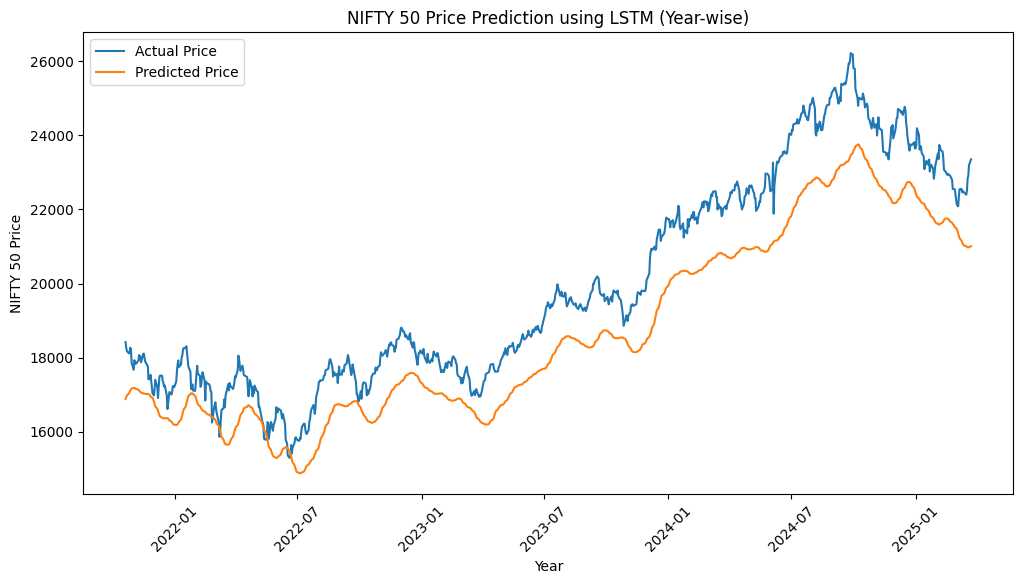

In [43]:
# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(srvs4055_nifty50.index[split+time_step+1:], y_test_actual, label='Actual Price')
plt.plot(srvs4055_nifty50.index[split+time_step+1:], y_pred_nifty, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('NIFTY 50 Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('NIFTY 50 Price Prediction using LSTM (Year-wise)')
plt.show()

In [44]:
# Downloading the entire available historical data for Bharat Petroleum Corporation Ltd.
srvs4055_bpcl = yf.download("BPCL.NS", start="2005-09-15", end="2025-03-25")
print("\nBPCL Data:")
srvs4055_bpcl.head()


[*********************100%***********************]  1 of 1 completed


BPCL Data:


Price,Close,High,Low,Open,Volume
Ticker,BPCL.NS,BPCL.NS,BPCL.NS,BPCL.NS,BPCL.NS
Date,,,,,
2005-09-15,14.817483,14.896856,14.565814,14.674225,2759820
2005-09-16,15.026559,15.100123,14.817480,14.817480,4206924
2005-09-19,15.884172,16.068084,15.100127,15.100127,7063980
2005-09-20,15.723491,15.874491,15.216281,15.797055,3317892
2005-09-21,15.613143,15.719619,15.258872,15.332437,5225076


In [45]:
# Extract closing prices
data_bpcl = srvs4055_bpcl[['Close']]

In [46]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

In [47]:
# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


In [48]:
time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(data_scaled, time_step)

In [49]:
# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [50]:
# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [51]:
# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [53]:
# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred_nestle):
    y_true, y_pred_nestle = np.array(y_true), np.array(y_pred_nestle)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred_nestle[nonzero_idx]) / y_true[nonzero_idx])) * 100

In [54]:
# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")


In [55]:
# Train the model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])


Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0160 - mae: 0.0788Epoch 1: Loss = 0.0053, Val Loss = 0.0004, MAE = 0.0414, Val MAE = 0.0168
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - loss: 0.0159 - mae: 0.0784 - val_loss: 4.0958e-04 - val_mae: 0.0168
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 8.4282e-04 - mae: 0.0200Epoch 2: Loss = 0.0008, Val Loss = 0.0005, MAE = 0.0192, Val MAE = 0.0180
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - loss: 8.4208e-04 - mae: 0.0200 - val_loss: 4.8098e-04 - val_mae: 0.0180
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 7.0373e-04 - mae: 0.0183Epoch 3: Loss = 0.0007, Val Loss = 0.0005, MAE = 0.0177, Val MAE = 0.0180
106/106 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - loss: 7.0326e-04 - mae: 0.0183 - val_loss: 4.8951e-04 - val_mae: 0.0180
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 5.3594e-04 - mae: 0.0156Epoch 4: Loss = 0.0005, Val Loss = 0.0004, MAE = 0.0152, Val MAE = 0.0161
106/106 ━━━━━━━━

In [56]:
# Predict on test data
y_pred_bpcl = model.predict(X_test)
y_pred_bpcl = scaler.inverse_transform(y_pred_bpcl.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


In [57]:
# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred_bpcl)
print(f"Final Model Accuracy: {accuracy:.2f}%")

Final Model Accuracy: 98.19%


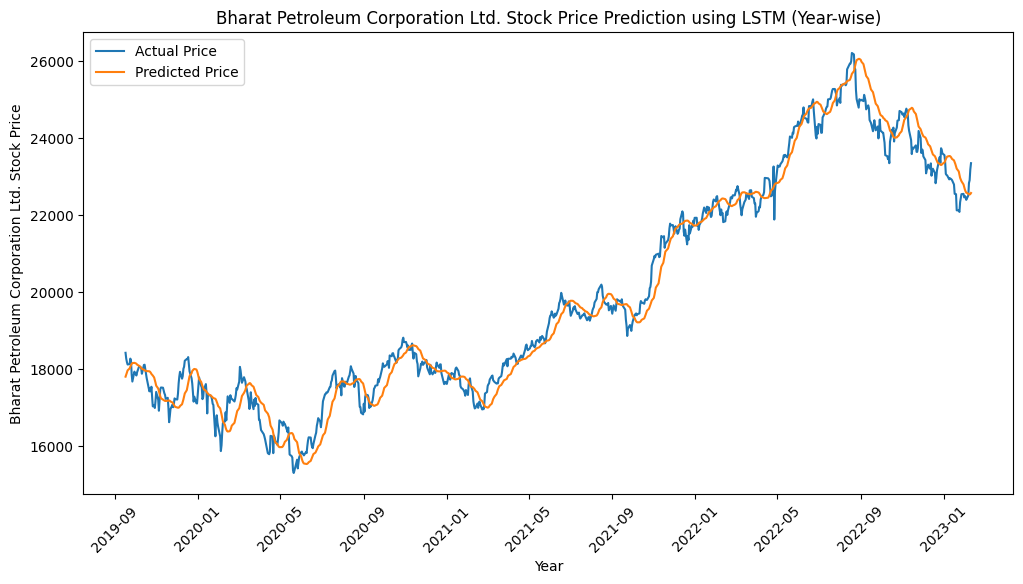

In [60]:
# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(data_bpcl.index[split+time_step+1:split+time_step+1+len(y_test_actual)], y_test_actual, label='Actual Price')
plt.plot(data_bpcl.index[split+time_step+1:split+time_step+1+len(y_pred_bpcl)], y_pred_bpcl, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('Bharat Petroleum Corporation Ltd. Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('Bharat Petroleum Corporation Ltd. Stock Price Prediction using LSTM (Year-wise)')
plt.show()

**Nifty 50 vs Bharat Petroleum Corporation Ltd.(Acutal Price Comparison)**

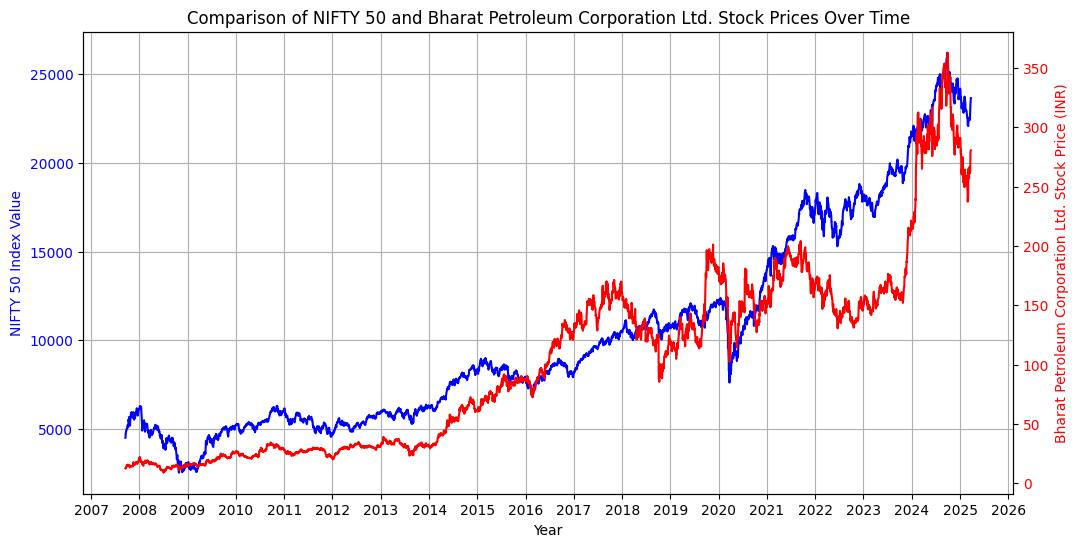

In [62]:
import matplotlib.dates as mdates
# Ensure both datasets have the same timeframe
common_dates = data_nifty50.index.intersection(data_bpcl.index)
nifty_common = data_nifty50.loc[common_dates]['Close']
bpcl_common = data_bpcl.loc[common_dates]['Close']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot NIFTY 50 on primary y-axis
ax1.plot(common_dates, nifty_common, label='NIFTY 50 Index', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for Bharat Petroleum Corporation Ltd. stock
ax2 = ax1.twinx()
ax2.plot(common_dates, bpcl_common, label='Bharat Petroleum Corporation Ltd. Stock Price', color='red')
ax2.set_ylabel('Bharat Petroleum Corporation Ltd. Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of NIFTY 50 and Bharat Petroleum Corporation Ltd. Stock Prices Over Time')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()

**Nifty 50 vs Bharat Petroleum Corporation Ltd. (Predicted Price Comparison)**

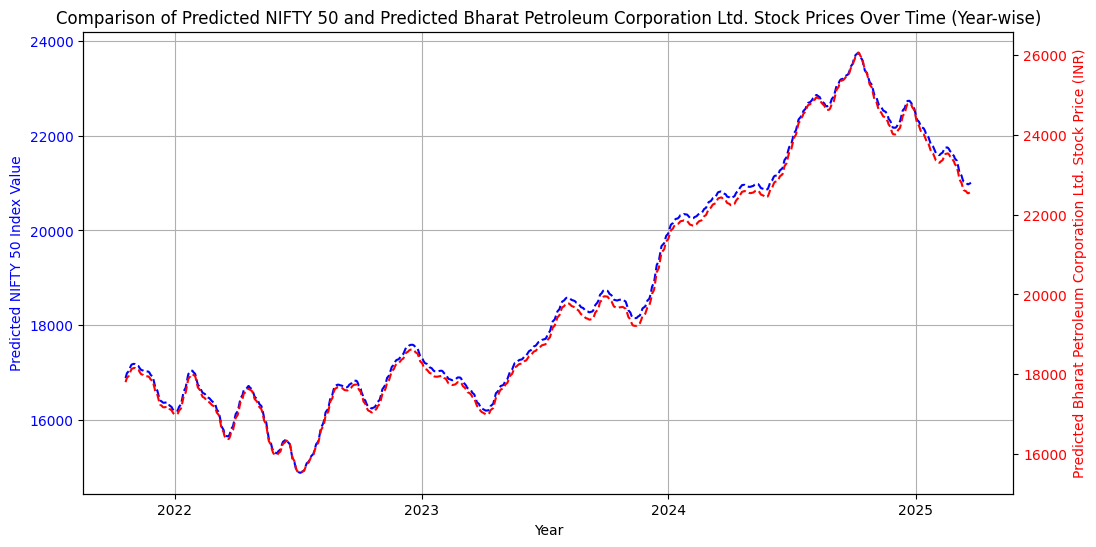

In [64]:
# Ensure both datasets have the same timeframe
common_dates = data_nifty50.index[split+time_step+1:].intersection(data_bpcl.index[split+time_step+1:])
common_indices = np.where(data_nifty50.index[split+time_step+1:].isin(common_dates))[0]  # Get index positions

# Extract common prediction values using indices
y_pred_nifty_common = y_pred_nifty[common_indices]
y_pred_bpcl_common = y_pred_bpcl[common_indices]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot predicted NIFTY 50 on primary y-axis
ax1.plot(common_dates, y_pred_nifty_common, label='Predicted NIFTY 50 Index', color='blue', linestyle='dashed')
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for predicted Nestle stock
ax2 = ax1.twinx()
ax2.plot(common_dates, y_pred_bpcl_common, label='Predicted Bharat Petroleum Corporation Ltd. Stock Price', color='red', linestyle='dashed')
ax2.set_ylabel('Predicted Bharat Petroleum Corporation Ltd. Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of Predicted NIFTY 50 and Predicted Bharat Petroleum Corporation Ltd. Stock Prices Over Time (Year-wise)')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()
